# Perceptron - linear activation function

A neural network algorithm with only one layer and that outputs a binary response variable (belong or not to a group).

I used the titanic dataset, available at Kaggle, which is composed of the following variables:

**PassangerId** - an identification number for each passanger <br>
**Survived** - dichotomos variable (survived = 1, did not survive = 0) <br>
**Name (str)** - Name of the passenger<br>
**Pclass (int)** - Ticket class<br>
**Sex (str)** - Sex of the passenger<br>
**Age (float)** - Age in years<br>
**SibSp (int)** - Number of siblings and spouses aboard<br>
**Parch (int)** - Number of parents and children aboard<br>
**Ticket (str)** - Ticket number<br>
**Fare (float)** - Passenger fare<br>
**Cabin (str)** - Cabin number<br>
**Embarked (str)** - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Import libraries

In [655]:
import numpy as np
import pandas as pd
import sklearn

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Perceptron
import warnings
import os
from scipy import stats
warnings.filterwarnings("ignore", category=FutureWarning)

## Import and explore data

In [656]:
path = 'C:/Users/Katia/Documents/Machine learning'
os.chdir(path)

# read csv data 
df = pd.read_csv('titanic.csv', sep=',')

In [657]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [658]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature engeneering

In [659]:
# Explore the number of unique values

for col in df.columns:
    print('{}: {} unique values'.format(col, df[col].nunique()))

PassengerId: 891 unique values
Survived: 2 unique values
Pclass: 3 unique values
Name: 891 unique values
Sex: 2 unique values
Age: 88 unique values
SibSp: 7 unique values
Parch: 7 unique values
Ticket: 681 unique values
Fare: 248 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [660]:
# Check number of NAs

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [661]:
# Fill age NAs with mean

df['Age'].fillna(df['Age'].mean(), inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [662]:
# To simplify, combine SibSp and Parch

df['Family_count'] = df['SibSp'] + df['Parch']

In [663]:
# Convert categorical variables to numeric

gender= {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender)

Embarked = {'Q': 1, 'S': 2, 'C': 3}
df['Embarked'] = df['Embarked'].map(Embarked)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_count
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,0


In [664]:
# Parse passenger name to create a title feature

df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# parse everything from the comma to the period
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_count,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,0,Mr


In [665]:
# Create a variable indicating whether or not cabin info was provided

df.groupby(df['Cabin'].isnull())['Survived'].mean()
df['Cabin_ind'] = np.where(df['Cabin'].isnull(), 0, 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_count,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,1,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,0,Mr,0


In [666]:
# Drop identifiers and repetitive variables

df.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_count,Title,Cabin_ind
0,0,3,0,22.000000,7.2500,2.0,1,Mr,0
1,1,1,1,38.000000,71.2833,3.0,1,Mrs,1
2,1,3,1,26.000000,7.9250,2.0,0,Miss,0
3,1,1,1,35.000000,53.1000,2.0,1,Mrs,1
4,0,3,0,35.000000,8.0500,2.0,0,Mr,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,13.0000,2.0,0,Rev,0
887,1,1,1,19.000000,30.0000,2.0,0,Miss,1
888,0,3,1,29.699118,23.4500,2.0,3,Miss,0
889,1,1,0,26.000000,30.0000,3.0,0,Mr,1


In [667]:
# Drop NAs to eliminate 2 NAs from Embarked

df.dropna(inplace=True)
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
Family_count    0
Title           0
Cabin_ind       0
dtype: int64

## Remove outliers

In [668]:
def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [669]:
for variable in ['Age','Fare']:
    outlier(variable)


Outlier caps for Age:
  --95p: 54.0 / 41 values exceed that
  --3sd: 68.5 / 7 values exceed that
  --99p: 65.0 / 8 values exceed that

Outlier caps for Fare:
  --95p: 112.3 / 45 values exceed that
  --3sd: 181.1 / 20 values exceed that
  --99p: 249.3 / 9 values exceed that


In [670]:
# Remove outliers based on 99 quantile

df['Age']= df['Age'].clip(upper=df['Age'].quantile(.99))
df['Fare'] = df['Fare'].clip(upper=df['Fare'].quantile(.99))

In [671]:
df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_count,Cabin_ind
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.594391,31.118044,2.102362,0.906637,0.227222
std,0.486260,0.834700,0.477538,12.785866,42.524308,0.515181,1.614703,0.419273
min,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,14.454200,2.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,65.000000,249.303304,3.000000,10.000000,1.000000


In [672]:
df.to_csv('titanic_clean.csv', index=False)

## Explore significance of variables

Let's explore the relationship with the dependent variable (i.e., survival status) and continuous variables. We can visually see this relationship through boxplots or run t-tests.

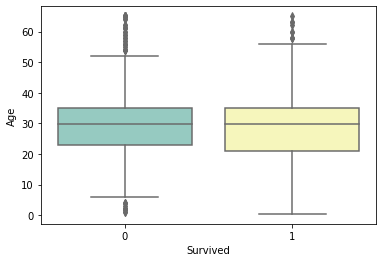

In [673]:
sns.boxplot(df['Survived'], df['Age'], palette="Set3") #palette set3 reduce transparency

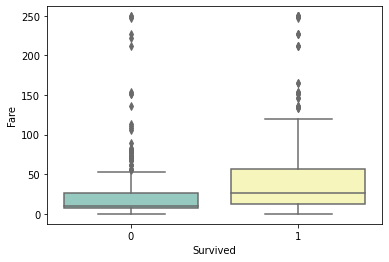

In [674]:
sns.boxplot(df['Survived'], df['Fare'], palette="Set3") #palette set3 reduce transparency

In [675]:
# Run a t-test to confirm the significance of the variable
    
def ttest(feature):
    survived = df[df['Survived']==1][feature]
    not_survived = df[df['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [676]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Age', 'Fare']:
    print(feature + ":")
    ttest(feature)

Age:
t-statistic: -2.2, p-value: 0.0294
Fare:
t-statistic: 7.4, p-value: 4.36e-13


Both continuous variables seem important at determining survival status.

## Explore categorical variables

Let's explore the relationship with the dependent variable (i.e., survival status) and categorical variables. We can visually see this relationship through countplots or run chisquares.

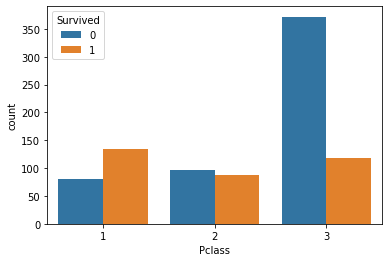

In [678]:
sns.countplot(df['Pclass'], hue = df['Survived'])

More people survived in the first class and more died in the third.

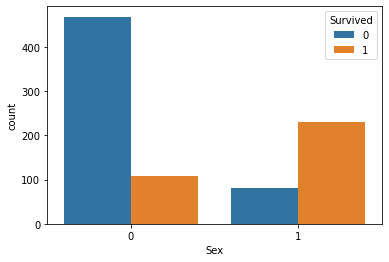

In [679]:
sns.countplot(df['Sex'], hue = df['Survived'])

More males died.

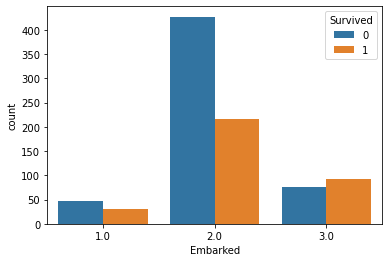

In [680]:
sns.countplot(df['Embarked'], hue = df['Survived'])

More people that embarked on Southampton died.

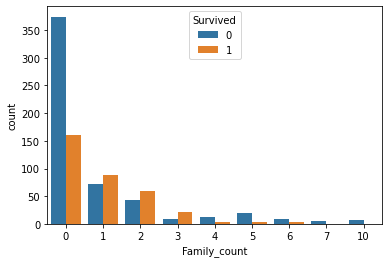

In [681]:
sns.countplot(df['Family_count'], hue = df['Survived'])

More people with 0 family members died.

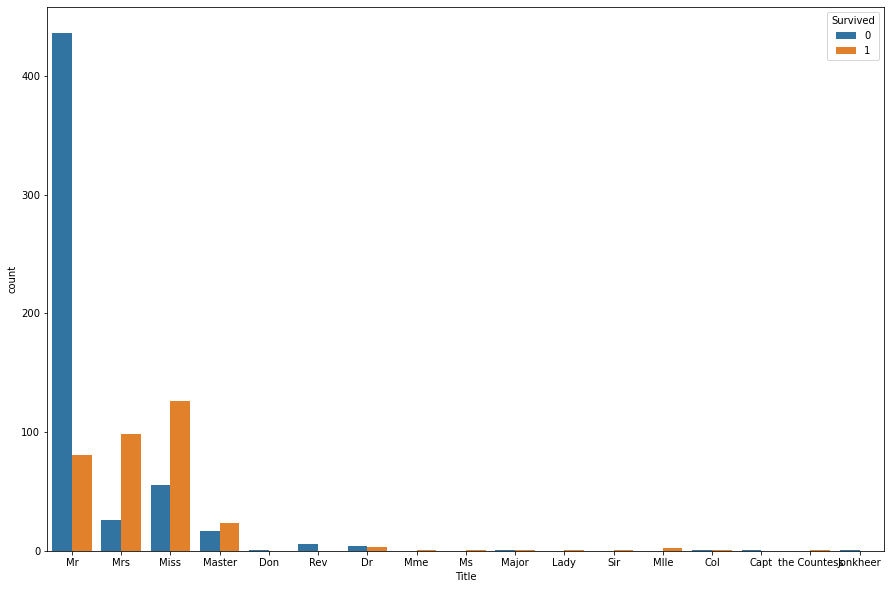

In [682]:
fig = plt.figure(figsize = (15,10))
sns.countplot(df['Title'], hue = df['Survived'])

More people with Mr. title died. In general more people with female titles survived. 

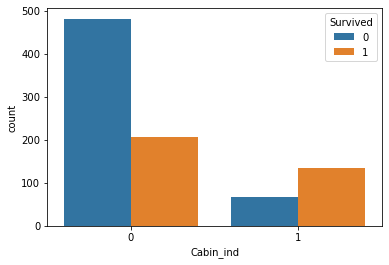

In [683]:
sns.countplot(df['Cabin_ind'], hue = df['Survived'])

More people with undesignated cabin died (possibly workers).

In [684]:
# Run chi-square to confirm the statistical importance of the variables

import scipy
from scipy.stats import chisquare

def chi_square(feature):
    crosstab = pd.crosstab(index = df[feature], columns = df['Survived'])
    print(crosstab)
    (chi2, p, dof, expctd) = stats.chi2_contingency(crosstab)
    print("chi2: ", chi2)
    print("p_value: ", p)
    print("Degrees of freedom: ", dof)
    print("*******************************")

In [685]:
# Run chi-square

for feature in ['Sex', 'Cabin_ind', 'Title', 'Pclass', 'Embarked', 'Family_count']:
    print(feature + ":")
    chi_square(feature)

Sex:
Survived    0    1
Sex               
0         468  109
1          81  231
chi2:  258.42661044637634
p_value:  3.7799096665574906e-58
Degrees of freedom:  1
*******************************
Cabin_ind:
Survived     0    1
Cabin_ind          
0          481  206
1           68  134
chi2:  85.80418269727531
p_value:  1.9866550640005987e-20
Degrees of freedom:  1
*******************************
Title:
Survived        0    1
Title                 
Capt            1    0
Col             1    1
Don             1    0
Dr              4    3
Jonkheer        1    0
Lady            0    1
Major           1    1
Master         17   23
Miss           55  126
Mlle            0    2
Mme             0    1
Mr            436   81
Mrs            26   98
Ms              0    1
Rev             6    0
Sir             0    1
the Countess    0    1
chi2:  297.78585165275405
p_value:  7.329534047032646e-54
Degrees of freedom:  16
*******************************
Pclass:
Survived    0    1
Pclass          

All categorical variables seem to be important to determine whether the passenger survived.

## Encode variables

In [686]:
from sklearn.preprocessing import LabelEncoder

for variable in ['Title']:
    le = LabelEncoder()
    df[variable] = le.fit_transform(df[variable].astype(str))
    
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_count,Title,Cabin_ind
0,0,3,0,22.0,7.2500,2.0,1,11,0
1,1,1,1,38.0,71.2833,3.0,1,12,1
2,1,3,1,26.0,7.9250,2.0,0,8,0
3,1,1,1,35.0,53.1000,2.0,1,12,1
4,0,3,0,35.0,8.0500,2.0,0,11,0


## Split training and testing data

In [687]:
from sklearn.model_selection import train_test_split

# Remove target from dataframe
target = df['Survived']
df = df.drop(['Survived'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family_count,Title,Cabin_ind
569,3,0,32.0,7.8542,2.0,0,11,0
786,3,1,18.0,7.4958,2.0,0,8,0
75,3,0,25.0,7.6500,2.0,0,11,1
114,3,1,17.0,14.4583,3.0,0,8,0
597,3,0,49.0,0.0000,2.0,0,11,0


In [688]:
# Check length of the sets

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(target), 2))

0.6
0.2
0.2


## Standardize data

In [689]:
from sklearn.preprocessing import StandardScaler

# Scale the training, test, and validation sets
variables = X_train.columns

X_train[variables] = scaler.transform(X_train[variables])
X_val[variables] = scaler.transform(X_val[variables])
X_test[variables] = scaler.transform(X_test[variables])

X_train.head()

C:\Users\katia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pclass,Sex,Age,Fare,Embarked,Family_count,Title,Cabin_ind
569,0.790548,-0.705118,0.188353,-0.526651,-0.192833,-0.582653,0.416527,-0.518698
786,0.790548,1.418203,-0.903372,-0.534416,-0.192833,-0.582653,-1.313413,-0.518698
75,0.790548,-0.705118,-0.357509,-0.531075,-0.192833,-0.582653,0.416527,1.927904
114,0.790548,1.418203,-0.981353,-0.383576,1.746413,-0.582653,-1.313413,-0.518698
597,0.790548,-0.705118,1.514020,-0.696810,-0.192833,-0.582653,0.416527,-0.518698


## Build Model

In [690]:
# Conduct search for best parameters

max_iter = [10,20,30,40]
eta0 = [0.15, 0.30, 0.40, 0.50]
random_state = [15, 30, 45, 60]

for item in max_iter:
    for value in eta0:
        for number in random_state:
            perceptron = Perceptron(max_iter=item, eta0=value, tol=1e-3, random_state=number)
            perceptron.fit(X_train, y_train.ravel())
            score = perceptron.score(X_train, y_train.ravel())
            print(perceptron, score)


Perceptron(eta0=0.15, max_iter=10, random_state=15) 0.7804878048780488
Perceptron(eta0=0.15, max_iter=10, random_state=30) 0.7823639774859287
Perceptron(eta0=0.15, max_iter=10, random_state=45) 0.6641651031894934
Perceptron(eta0=0.15, max_iter=10, random_state=60) 0.7823639774859287
Perceptron(eta0=0.3, max_iter=10, random_state=15) 0.7804878048780488
Perceptron(eta0=0.3, max_iter=10, random_state=30) 0.7823639774859287
Perceptron(eta0=0.3, max_iter=10, random_state=45) 0.6641651031894934
Perceptron(eta0=0.3, max_iter=10, random_state=60) 0.7823639774859287
Perceptron(eta0=0.4, max_iter=10, random_state=15) 0.7804878048780488
Perceptron(eta0=0.4, max_iter=10, random_state=30) 0.7823639774859287
Perceptron(eta0=0.4, max_iter=10, random_state=45) 0.6641651031894934
Perceptron(eta0=0.4, max_iter=10, random_state=60) 0.7823639774859287
Perceptron(eta0=0.5, max_iter=10, random_state=15) 0.7804878048780488
Perceptron(eta0=0.5, max_iter=10, random_state=30) 0.7823639774859287
Perceptron(eta0=

C:\Users\katia\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(eta0=0.15, max_iter=20, random_state=15) 0.7804878048780488
Perceptron(eta0=0.15, max_iter=20, random_state=30) 0.7823639774859287
Perceptron(eta0=0.15, max_iter=20, random_state=45) 0.7523452157598499
Perceptron(eta0=0.15, max_iter=20, random_state=60) 0.7823639774859287
Perceptron(eta0=0.3, max_iter=20, random_state=15) 0.7804878048780488
Perceptron(eta0=0.3, max_iter=20, random_state=30) 0.7823639774859287
Perceptron(eta0=0.3, max_iter=20, random_state=45) 0.7523452157598499
Perceptron(eta0=0.3, max_iter=20, random_state=60) 0.7823639774859287
Perceptron(eta0=0.4, max_iter=20, random_state=15) 0.7804878048780488
Perceptron(eta0=0.4, max_iter=20, random_state=30) 0.7823639774859287
Perceptron(eta0=0.4, max_iter=20, random_state=45) 0.7523452157598499
Perceptron(eta0=0.4, max_iter=20, random_state=60) 0.7823639774859287
Perceptron(eta0=0.5, max_iter=20, random_state=15) 0.7804878048780488
Perceptron(eta0=0.5, max_iter=20, random_state=30) 0.7823639774859287
Perceptron(eta0=

The minimum parameters for the highest score, without convergence, is (eta0=0.15,	max_iter=15, random_state=30), with a classification score of approximately 78%.


In [691]:
perceptron = Perceptron(max_iter=15, eta0=0.15, random_state=10)

perceptron.fit(X_train, y_train.ravel())

Perceptron(eta0=0.15, max_iter=15, random_state=10)

In [692]:
y_pred = perceptron.predict(X_test)

In [693]:
print(y_test)

830    1
734    0
378    0
683    0
362    0
      ..
694    0
584    0
142    1
260    0
545    0
Name: Survived, Length: 178, dtype: int64


In [694]:
print(y_pred)

[1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [695]:
# Validate with test set

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       105
           1       0.71      0.78      0.75        73

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.78       178
weighted avg       0.79      0.78      0.78       178



In [696]:
# Validate with validation set

y_pred2 = perceptron.predict(X_val)
print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       109
           1       0.64      0.81      0.72        69

    accuracy                           0.75       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.75      0.76       178



Overall, precision, recall and accuracy are in the 70s, suggesting that perceptron does a decent job at classifying those who survived from those who did not from the Titanic.